# Soal

Pada praktikum hari ini, kita akan melihat sebuah rangkaian listrik yang memiliki konfigurasi unik. Jika sebuah rangkaian listrik memiliki konfigurasi seperti yang ada di bawah, kita bisa menambahkan 3 buah resistor ($R_{3k - 2}, R_{3k - 1}, R_{3k}$) secara terus menerus, sehingga terbentuk loop baru.

Misalkan $m$ menyatakan banyaknya loop yang ada pada konfigurasi rangkaian listrik di bawah.

Gambar atas memperlihatkan contoh untuk dua buah nilai $m$, yakni $m = 1$ dan $m = 2$.

Gambar bawah memperlihatkan kasus umum, yakni $m$ tidak di khususkan nilainya.

Gambar atas:

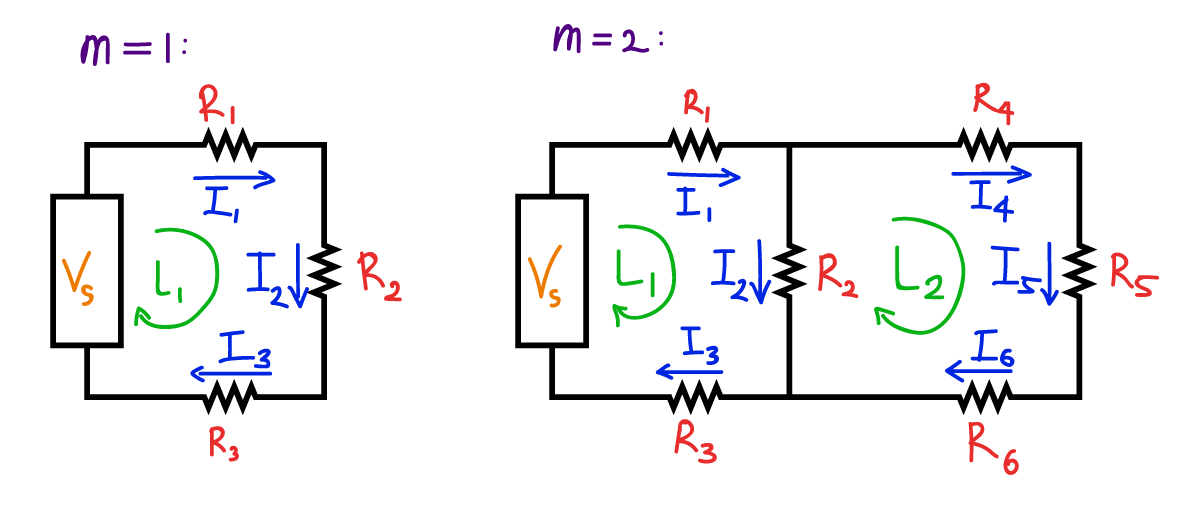

Gambar bawah:

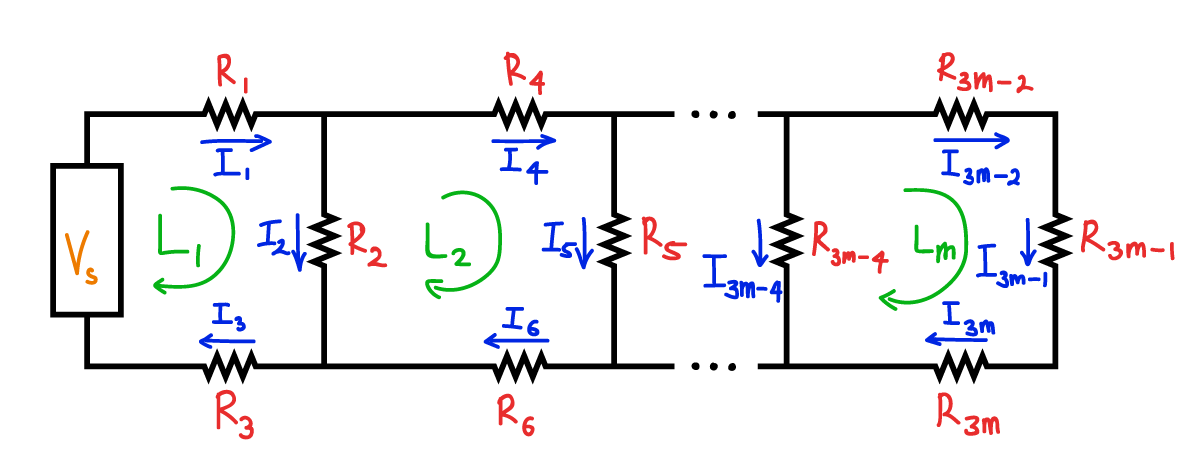

Misalkan diberikan informasi mengenai:
- Banyak loop (dinotasikan dengan $m$)
- Voltase sumber (dinotasikan dengan $V_s$)
- Besar resistansi di setiap resistor (dinotasikan dengan $R_1, R_2, ..., R_{3m}$)

Jika kita ingin mengetahui berapa besar arus yang mengalir pada setiap resistor (dinotasikan dengan $I_1, I_2, ..., I_{3m}$), maka kita bisa menggunakan tiga prinsip/hukum yang ada:
- Hukum Kirchoff 1 (arus)
- Hukum Kirchoff 2 (voltase pada loop)
- Kesamaan besar arus listrik pada loop terakhir ($R_{3m - 2}, R_{3m - 1}, R_{3m}$)

Dengan menggunakan ketiga prinsip/hukum di atas, maka kita akan mendapatkan $3m$ buah persamaan, untuk nantinya dibuat menjadi sistem persamaan dalam bentuk matriks $AI = b$.

---
**Soal:**

Untuk mencari nilai elemen-elemen pada vektor $I$, yang ada di persamaan $AI = b$, maka kita dapat menggunakan **Metode Dekomposisi Doolittle**. Untuk permasalahan ini, cari nilai setiap elemen $I$, dengan melengkapi fungsi 'besar_arus' menggunakan **Metode Dekomposisi Doolittle**.

Silahkan lihat bagian "Membangun Matriks $A$ dan Vektor $b$ (General)" untuk membuat matriks $A$ dan vektor $b$ secara general, atau bagian "Membangun Matriks $A$ dan Vektor $b$ (Khusus)" untuk membuat matriks $A$ dan vektor $b$ pada kasus tertentu ($m = 1, 2, 3$).

**Catatan:**

Jika anda tidak dapat/mampu membuat matriks $A$ secara umum, maka anda cukup untuk membuat matriks $A$ pada kasus $m = 1, 2, 3$ saja (secara berurutan, matriks $A$ akan memiliki ukuran $3 \times 3, 6 \times 6, 9 \times 9$). Jika kode anda benar, maka anda mendapatkan maksimal $\sim 75\%$ nilai algoritma (hanya nilai algoritma saja yang tidak maksimal).

---

**Ketentuan Khusus:**

- Modul yang dapat digunakan:
  - numpy.array

- Elemen pada $I$ tidak perlu dibulatkan

- Asumsikan proses tidak akan gagal

---
**Asumsi:**
- $m > 0$, dengan $m$ merupakan bilangan bulat
- $V_s, I_i,$ dan $R_i$ merupakan bilangan riil, untuk seluruh $i \in \{1, 2, ..., 3m\}$
- $\forall R \in \{R_1, R_2, ..., R_{3m}\}, \ R > 0$
- $V_s \neq 0$

---
**Fungsi besar_arus:**
- Deskripsi: Mencari arus yang mengalir pada setiap resistor untuk rangkaian listrik tertentu, jika diberikan besar voltase ($V$) sumber listrik dan resistor ($R_i$)
- Masukan:
  - $m$: Banyak loop (integer)
  - $R$: Array berukuran 3*m, berisi nilai resistansi dari setiap resistor $[R_1, R_2, ..., R_{3m - 1}, R_{3m}]$ ($R_i$ float)
  - $V_s$: Voltase sumber listrik (float)
- Keluaran:
  - $I$: Array (boleh array dari numpy atau bawaan python) berukuran 3*m, berisi besar arus listrik, serta $R_i$ berkorespondensi dengan $I_i$. $[I_1, I_2, ..., I_{3m - 1}, I_{3m}]$ ($I_i$ float)

## Membangun Matriks $A$ dan Vektor $b$ (General)

Berdasarkan hukum Kirchoff 2 (voltase pada loop, $\Sigma IR = \Sigma V$), diperoleh $m$ buah persamaan, yakni: ($i = 1, 2, ..., m$)

Untuk $i = 1$:

$I_1 R_1 + I_2 R_2 + I_3 R_3 = V_s$

Untuk $i = 2, 3, ..., m$:

$-I_2 R_2 + I_4 R_4 + I_5 R_5 + I_6 R_6 = 0 \\
-I_5 R_5 + I_7 R_7 + I_8 R_8 + I_9 R_9 = 0 \\
... \\
-I_{3i-4} R_{3i-4} + I_{3i-2} R_{3i-2} + I_{3i-1} R_{3i-1} + I_{3i} R_{3i} = 0 \\
...$

=========================================================

Berdasarkan hukum Kirchoff 1 (arus, $\Sigma I_{masuk} = \Sigma I_{keluar}$), diperoleh $2m - 2$ buah persamaan, yang selanjutnya dikelompokkan menjadi $m - 1$ paket persamaan dengan setiap paket berisi 2 persamaan, yakni: ($i = 1, 2, ..., m - 1$)

Paket persamaan ke-1:
$I_1 - I_2 - I_4 = 0 \\ 
I_2 - I_3 + I_6 = 0$

Paket persamaan ke-2:
$I_4 - I_5 - I_7 = 0 \\
I_5 - I_6 + I_9 = 0 \\
... $

Paket persamaan ke-$i$:
$I_{3i - 2} - I_{3i - 1} - I_{3i + 1} = 0 \\
I_{3i - 1} - I_{3i} + I_{3i + 3} = 0 \\
... $

Untuk selanjutnya, persamaan pertama pada paket ke-i disebut sebagai persamaan atas, persamaan kedua pada paket ke-i disebut sebagai persaman bawah.

=========================================================

Selain itu, dari loop terakhir, didapat 2 persamaan yakni $I_{3m - 2} = I_{3m - 1}$ dan $I_{3m - 1} = I_{3m}$. Sehingga:

$I_{3m - 2} - I_{3m - 1}= 0 \\
I_{3m - 1} - I_{3m}= 0$


---
Dari hasil sebelumnya, didapat sistem persamaan linear (SPL) dengan $3m$ persamaan dan $3m$ variabel yang ingin diketahui nilainya. SPL ini dapat diubah kedalam bentuk matriks dan vektor, yakni $AI = b$.

Penyusunan persamaan linear perlu dilakukan dengan hati-hati, dikarenakan banyaknya elemen pada matriks $A$ dengan nilai 0. Penyusunan persamaan linear akan dilakukan dengan menggunakan aturan: ($j = 1, 2, ..., m - 1$)
- Baris $1$: Hukum Kirchoff 2 (voltase pada loop), dengan $i = 1$ ($I_1 R_1 + I_2 R_2 + I_3 R_3 = V_s$)
- Baris $3j - 1$: Hukum Kirchoff 2 (voltase pada loop), dengan $i = j + 1$
- Baris $3j$: Hukum Kirchoff 1 (arus), persamaan bawah pada paket persamaan ke-$j$
- Baris $3j + 1$: Hukum Kirchoff 1 (arus), persamaan atas pada paket persamaan ke-$j$
- Baris $3m - 1$ dan $3m$, berisi persamaan dari kesamaan arus di loop terakhir, yakni $I_{3m - 2} - I_{3m - 1}= 0$ dan $I_{3m - 1} - I_{3m}= 0$

Untuk memudahkan penulisan, definisikan submatriks:
- $A_1$ sebagai baris $1$ dari matriks $A$ atau poin 1 pada aturan diatas ($I_1 R_1 + I_2 R_2 + I_3 R_3 = V_s$). $A_1$ berukuran $1 \times 3m$.
- $A_2$ didefinisikan sebagai poin 2, 3, dan 4, pada aturan diatas. $A_2$ berukuran $3(m-1) \times 3m$
- $A_3$ didefinisikan sebagai poin 5 pada aturan diatas. $A_3$ berukuran $2 \times 3m$

Maka elemen-elemen dari matriks $A$ dan vektor $I$ serta $b$ adalah:

$A = \begin{bmatrix}
A_1 \\
A_2 \\
A_3
\end{bmatrix}, \ $
$I = \begin{bmatrix}
I_1 \\
I_2 \\
I_3 \\
\vdots \\
I_{3m}
\end{bmatrix}, \ $
$ b = \begin{bmatrix}
V_s \\
0 \\
0 \\
\vdots \\
0
\end{bmatrix}$

Elemen-elemen dari ketiga submatriks $A_1, A_2, A_3$ memiliki nilai:

$A_1 = \begin{bmatrix}
R_1 & R_2 & R_3 & 0 & 0 & \dots & 0 & 0
\end{bmatrix}$

$A_2 = \begin{bmatrix}
0 & -R_2 & 0 & R_4 & R_5 & R_6 & 0 & 0 & 0 & 0 & \dots & 0\\
0 & 1 & -1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & \dots & 0 \\
1 & -1 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & 0\\ \hdashline
0 & 0 & 0 & 0 & -R_5 & 0 & R_7 & R_8 & R_9 & 0 & \dots & 0\\
0 & 0 & 0 & 0 & 1 & -1 & 0 & 0 & 1 & 0 &\dots & 0 \\
0 & 0 & 0 & 1 & -1 & 0 & -1 & 0 & 0 & 0 & \dots & 0 \\ \hdashline
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\
\end{bmatrix}$

$A_3 = \begin{bmatrix}
0 & 0 & \dots & 0 & 1 & -1 & 0\\
0 & 0 & \dots & 0 & 0 & 1 & -1
\end{bmatrix}$

## Membangun Matriks $A$ dan Vektor $b$ (Khusus)

Garis horizontal (baik patah-patah maupun tidak), hanya digunakan sebagai penanda. Kedua jenis garis tersebut ada, jika anda ingin memperumum $m$ sehingga nilainya dapat berapapun (bulat positif).

Persamaan yang digunakan adalah $AI = b$.

$m = 1:$

$A = \begin{bmatrix}
R_1 & R_2 & R_3 \\ \hline
1 & -1 & 0\\
0 & 1 & -1
\end{bmatrix}, \ $
$I = \begin{bmatrix}
I_1 \\
I_2 \\
I_3 \\
\end{bmatrix}, \ $
$ b = \begin{bmatrix}
V_s \\
0 \\
0
\end{bmatrix}$

$m = 2:$

$A = \begin{bmatrix}
R_1 & R_2 & R_3 & 0 & 0 & 0 \\ \hline
0 & -R_2 & 0 & R_4 & R_5 & R_6 \\
0 & 1 & -1 & 0 & 0 & 1 \\
1 & -1 & 0 & -1 & 0 & 0 \\ \hline
0 & 0 & 0 & 1 & -1 & 0 \\
0 & 0 & 0 & 0 & 1 & -1
\end{bmatrix}, \ $
$I = \begin{bmatrix}
I_1 \\
I_2 \\
I_3 \\
I_4 \\
I_5 \\
I_6 \\
\end{bmatrix}, \ $
$ b = \begin{bmatrix}
V_s \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}$

$m = 3:$

$A = \begin{bmatrix}
R_1 & R_2 & R_3 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline
0 & -R_2 & 0 & R_4 & R_5 & R_6 & 0 & 0 & 0 \\
0 & 1 & -1 & 0 & 0 & 1 & 0 & 0 & 0 \\
1 & -1 & 0 & -1 & 0 & 0 & 0 & 0 & 0 \\ \hdashline
0 & 0 & 0 & 0 & -R_5 & 0 & R_7 & R_8 & R_9 \\
0 & 0 & 0 & 0 & 1 & -1 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 & -1 & 0 & -1 & 0 & 0 \\ \hline
0 & 0 & 0 & 0 & 0 & 0 & 1 & -1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & -1
\end{bmatrix}, \ $
$I = \begin{bmatrix}
I_1 \\
I_2 \\
I_3 \\
I_4 \\
I_5 \\
I_6 \\
I_7 \\
I_8 \\
I_9 \\
\end{bmatrix}, \ $
$ b = \begin{bmatrix}
V_s \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}$

In [1]:
import numpy as np

def construct_A1(R):
    A1 = [0 for i in range(len(R))]
    for i in range(3):
        A1[i]=R[i]
    
    return np.array(A1)

def construct_A2(R):
    
    def construct_3by6_matrix(values):
    #Asume values to be ordered 
        return np.array([[0,-values[0],0,values[1],values[3],values[4]],[0,1,-1,0,0,1],[1,-1,0,-1,0,0]])

    m=int(len(R)/3)
    matrix_store =[0 for i in range(m-1)]
    for n in range(m-1):
        matrix_segment= construct_3by6_matrix(R[3*n+1:3*n+7])
        for k in range(n):
            matrix_segment = np.concatenate((np.zeros([3,3]),matrix_segment),axis=1)
        while len(matrix_segment[0]) < len(R):
                  matrix_segment = np.concatenate((matrix_segment,np.zeros([3,3])),axis=1)
        matrix_store[n] = matrix_segment
    
    return np.concatenate(matrix_store,axis=0)


def construct_A3(R):
    m=int(len(R)/3)
    row_1 = [0 for i in range(3*m)]
    row_2 = [0 for i in range(3*m)]
    row_1[-3] = 1
    row_1[-2] = -1
    row_2[-2] = 1
    row_2[-1] = -1
    return np.array([row_1,row_2])

# Jawab

In [2]:
### Jawaban ###
### Isi jawaban Anda di bawah ###
import numpy as np

def forward_substitution(L,b):
    n=len(b)
    solution=np.zeros_like(b)
    for i in range(n):
        s=0
        for j in range(i):
            s=s+(L[i,j])*solution[j]
        solution[i]=(b[i]-s)/L[i,i]
    
    return solution

        
def backward_substitution(U,b):
    n=len(b)
    solution=np.zeros_like(b)
    
    for i in range(n-2, -1, -1):
        s = 0
        for j in range(i+1, n):
            s += U[i,j]*solution[j]

        solution[i] = (b[i]-s)/U[i,i]
        
    return solution

def luDecomposition(matrix):
    n=len(matrix)
    l = [[0 for i in range(n)] for j in range(n)]
    u = [[0 for i in range(n)] for j in range(n)]
    #Start decomposition
    for i in range(n):
        #U Matrix
        for k in range(i,n):
            sum = 0
            for j in range(i):
                sum += (l[i][j] * u[j][k])
            u[i][k] = matrix[i][k] - sum 
        #L Matrix
        for k in range(i,n):
            if(i==k):
                l[i][i]=1
            else:
                sum = 0
                for j in range(i):
                    sum = (l[k][j] * u[j][i])
                l[k][i] = (matrix[k][i] - sum)/u[i][i]
    return np.mat(l),np.mat(u)

def besar_arus(m, R, V_s):
    R = R.copy()
    b=np.array([V_s if i==0 else 0 for i in range(len(R))])
    if m ==1:
        A=np.array([R, [1,-1,0],[0,1,-1]])
        L,U = luDecomposition(A)
        L_U_I = forward_substitution(L,b)
        return  backward_substitution(U,L_U_I)
    else:
        # Jika m > 1 akan lansung di asumsikan m = len(R)/3
        A1 = construct_A1(R)
        A2 = construct_A2(R)
        A3 = construct_A3(R)
#       A = np.concatenate((A1, A2, A3), axis=0) <--- LOL Tipsnya salah ?
#       https://stackoverflow.com/questions/41989950/numpy-array-concatenate-valueerror-all-the-input-arrays-must-have-same-number
        A = np.concatenate((A1[None,:],A2,A3), axis=0) 
        L,U = luDecomposition(A)
        L_U_I = forward_substitution(L,b)
        return  backward_substitution(U,L_U_I)


## Periksa Jawaban

In [3]:
m = 1
R = [10, 20, 30]
V_s = 60
besar_arus(m, R, V_s)

array([2, 2, 0])

In [9]:
R= [1,2,3,4,5,6,7,8,9]
m = len(R)
V_s = 75
besar_arus(m, R, V_s)

array([-52,  23,  27,   1,   4,   4,   2,   1,   0])

In [10]:
R= [1,2,3,4,5,6,7,8,9,10,11,12]
m = len(R)
V_s = 100
besar_arus(m, R, V_s)

array([-78,  32,  38,   1,   5,   6,   2,   1,   1,   1,   0,   0])

# Tips


Gunakan perintah berikut untuk menggabungkan A1, A2, A3 menjadi numpy array A berukuran (3m, 3m)
```
A = np.concatenate((A1, A2, A3), axis=0)
```


